# MBA Admission Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading the dataset

In [2]:
df = pd.read_csv('MBA.csv')

In [3]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [4]:
df.dtypes

application_id      int64
gender             object
international        bool
gpa               float64
major              object
race               object
gmat              float64
work_exp          float64
work_industry      object
admission          object
dtype: object

In [5]:
df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


In [6]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64


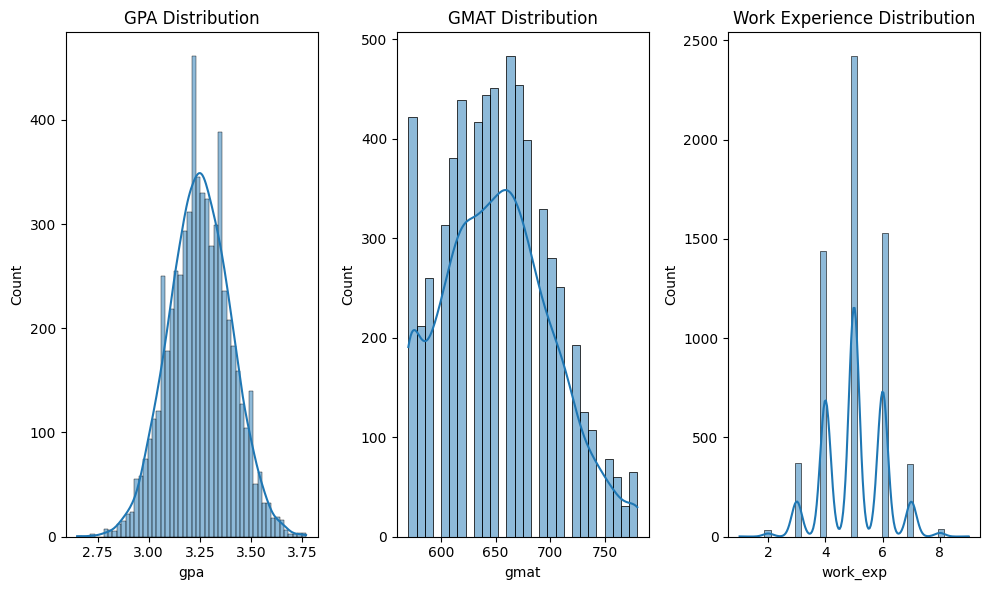

In [7]:
# Distribution of Numerical Features (GPA, GMAT, Work Experience)
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['gpa'], kde=True)
plt.title('GPA Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['gmat'], kde=True)
plt.title('GMAT Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['work_exp'], kde=True)
plt.title('Work Experience Distribution')

plt.tight_layout()
plt.show()

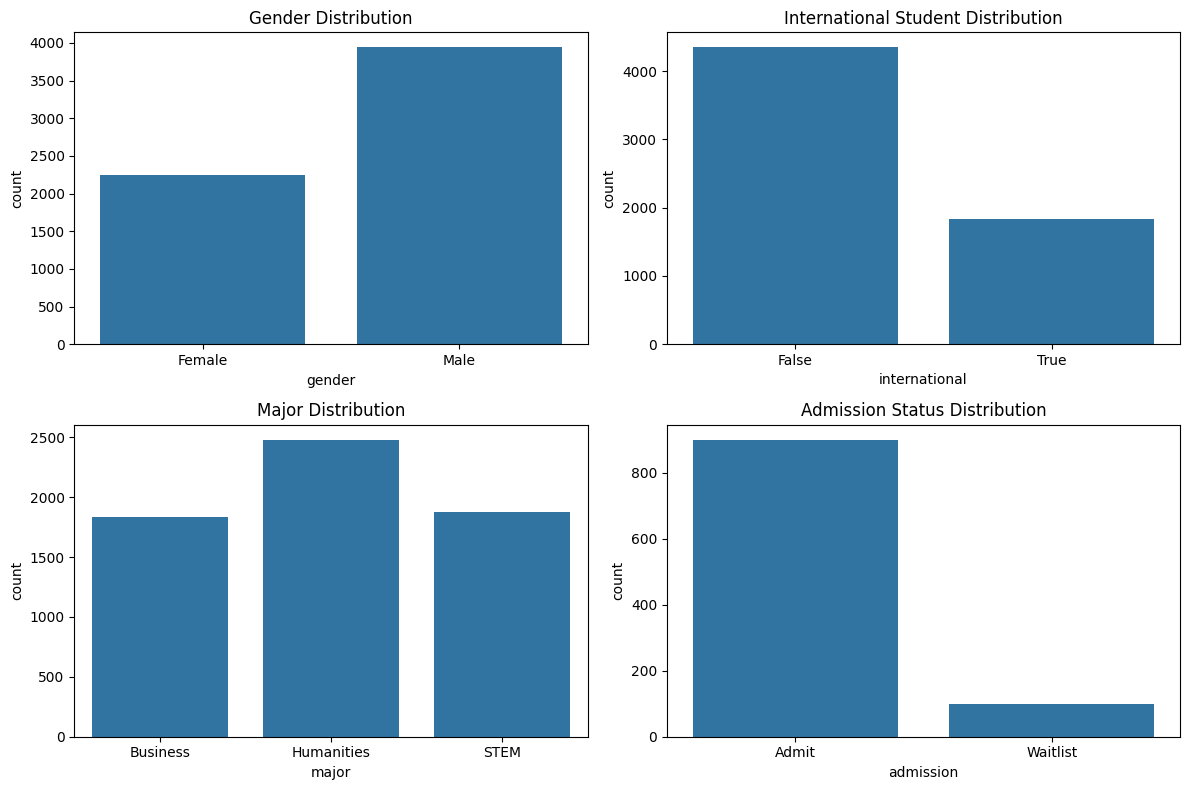

In [8]:
# Countplot for Categorical Variables
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='international', data=df)
plt.title('International Student Distribution')

plt.subplot(2, 2, 3)
sns.countplot(x='major', data=df)
plt.title('Major Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='admission', data=df)
plt.title('Admission Status Distribution')

plt.tight_layout()
plt.show()

## Handling missing values

In [9]:
# Replace missing values in 'admission' with 'Deny'
df['admission'].fillna('Deny', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_16748\3391972543.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('Deny', inplace=True)


In [10]:
df['race'].fillna('Unknown', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_16748\2563660107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna('Unknown', inplace=True)


In [11]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'international', 'major', 'race', 'work_industry'], drop_first=True)

In [12]:
# Drop 'application_id' since it doesn't contribute to the prediction
df_encoded = df_encoded.drop('application_id', axis=1)

In [13]:
print(df_encoded.head())

    gpa   gmat  work_exp admission  gender_Male  international_True  \
0  3.30  620.0       3.0     Admit        False               False   
1  3.28  680.0       5.0      Deny         True               False   
2  3.30  710.0       5.0     Admit        False                True   
3  3.47  690.0       6.0      Deny         True               False   
4  3.35  590.0       5.0      Deny         True               False   

   major_Humanities  major_STEM  race_Black  race_Hispanic  ...  \
0             False       False       False          False  ...   
1              True       False        True          False  ...   
2             False       False       False          False  ...   
3             False        True        True          False  ...   
4             False        True       False           True  ...   

   work_industry_Health Care  work_industry_Investment Banking  \
0                      False                             False   
1                      False          

In [14]:
X = df_encoded.drop('admission', axis=1)  # Features
y = df_encoded['admission']  # Target variable

In [15]:
# Correlation Matrix 

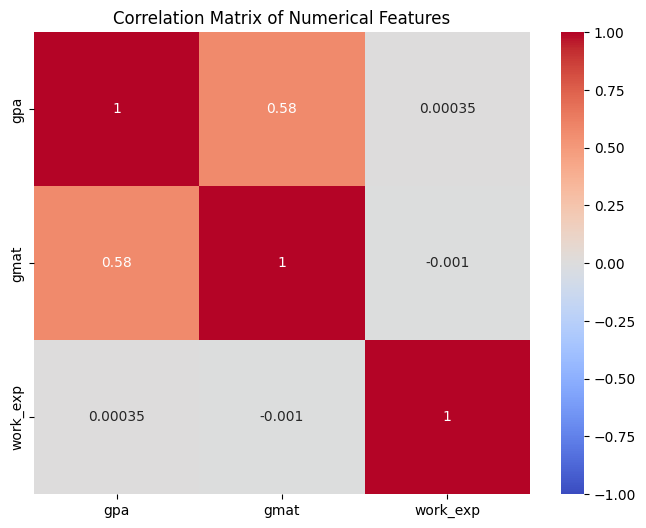

In [16]:
# Compute correlation matrix
corr_matrix = df_encoded[['gpa', 'gmat', 'work_exp']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

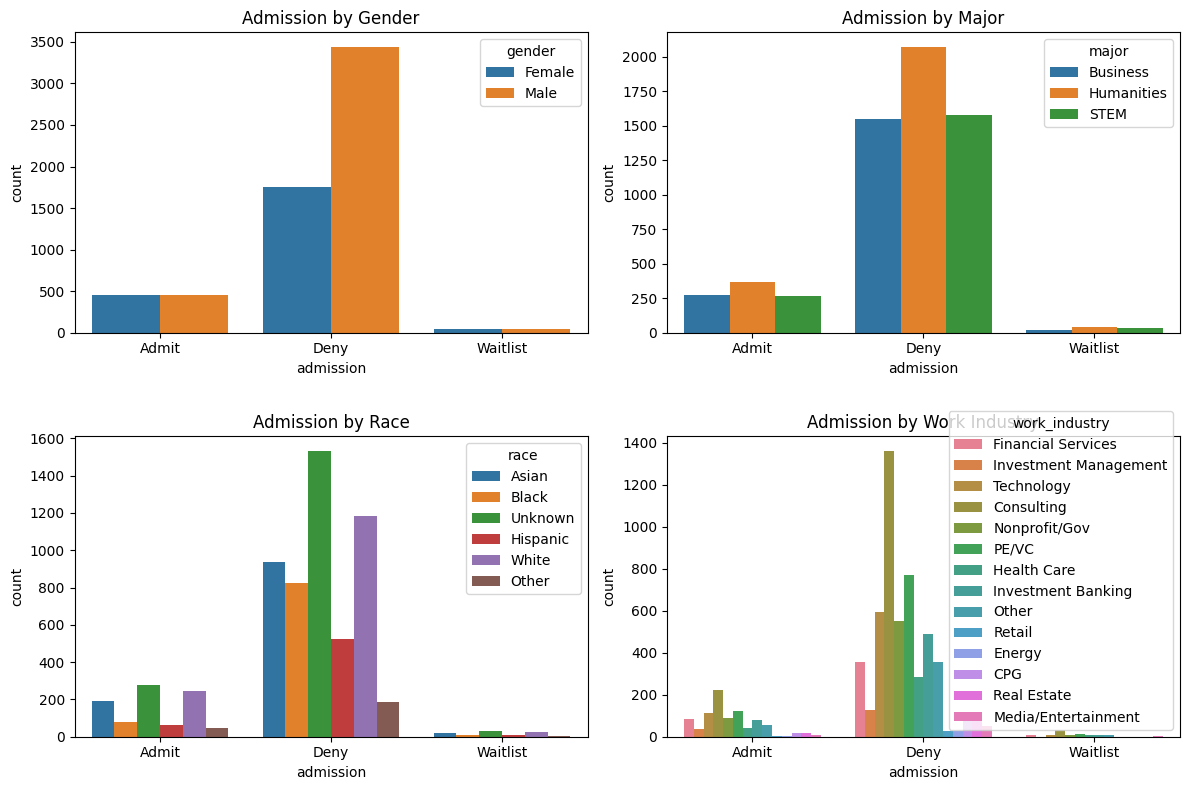

In [17]:
# Visualizing the relationship between categorical variables and admission status
plt.figure(figsize=(12, 8))

# Admission by Gender
plt.subplot(2, 2, 1)
sns.countplot(x='admission', hue='gender', data=df)
plt.title('Admission by Gender')

# Admission by Major
plt.subplot(2, 2, 2)
sns.countplot(x='admission', hue='major', data=df)
plt.title('Admission by Major')

# Admission by Race
plt.subplot(2, 2, 3)
sns.countplot(x='admission', hue='race', data=df)
plt.title('Admission by Race')

# Admission by Work Industry
plt.subplot(2, 2, 4)
sns.countplot(x='admission', hue='work_industry', data=df)
plt.title('Admission by Work Industry')

plt.tight_layout()
plt.show()

In [18]:
# Outliers

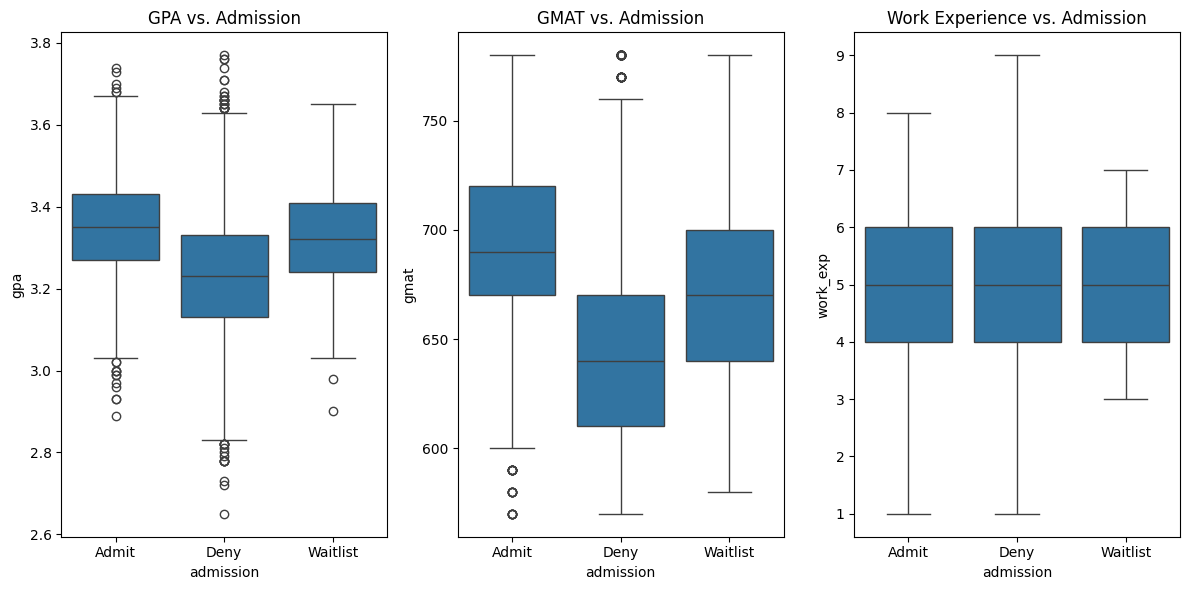

In [19]:
# Boxplots for outlier detection in numerical features
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='admission', y='gpa', data=df)
plt.title('GPA vs. Admission')

plt.subplot(1, 3, 2)
sns.boxplot(x='admission', y='gmat', data=df)
plt.title('GMAT vs. Admission')

plt.subplot(1, 3, 3)
sns.boxplot(x='admission', y='work_exp', data=df)
plt.title('Work Experience vs. Admission')

plt.tight_layout()
plt.show()

## Data Split and Model Training

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# Label encoding the target variable (admission)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [22]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [23]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [24]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [26]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [27]:
# Detailed classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       Admit       0.46      0.22      0.30       196
        Deny       0.85      0.95      0.90      1025
    Waitlist       0.00      0.00      0.00        18

    accuracy                           0.82      1239
   macro avg       0.44      0.39      0.40      1239
weighted avg       0.78      0.82      0.79      1239

